OpenCV
- Open Source Computer Vision Library는 오픈소스 이미지(동영상) 라이브러리
- 이미지 형식 변환, 필터 처리, 얼굴 인식, 물체 인식, 문자 인식 등 이미지와 관련된 다양한 처리
- 머신러닝에서 OpenCV 사용 : 머신러닝의 입력으로 전달하려면 이미지를 숫자 배열 데이터로 변경
- pip install opencv-python

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


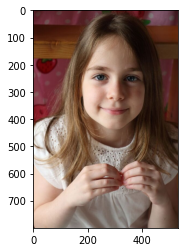

In [6]:
import matplotlib.pyplot as plt
import cv2

filepath = 'drive/MyDrive/girl.png'
img = cv2.imread(filepath)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [7]:
cv2.imwrite('drive/MyDrive/girl1.png', img)

True

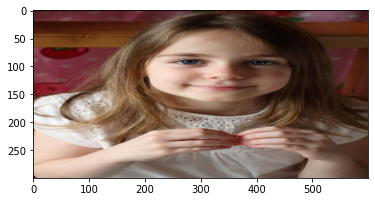

In [9]:
#이미지 크기 변경하기
im2 = cv2.resize(img, (600,300))

#이미지 저장하기
cv2.imwrite('drive/MyDrive/girl_resize.png', im2)

#이미지 출력하기
plt.imshow(cv2.cvtColor(im2, cv2.COLOR_BGR2RGB))
plt.show()

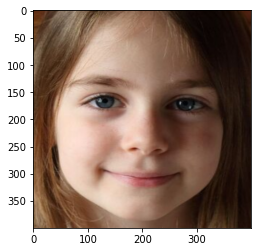

True

In [12]:
#이미지 자르기
im3 = img[100:450, 150:450] #y1:y2, x1:x2

#이미지 크기 변경하기
im3 = cv2.resize(im3, (400,400))

#이미지 출력하기
plt.imshow(cv2.cvtColor(im3, cv2.COLOR_BGR2RGB))
plt.show()

#이미지 저장하기
cv2.imwrite('drive/MyDrive/girl_cut_resize.png', im3)

얼굴 검출 - 자동으로 얼굴에 모자이크 처리
- 인간의 얼굴이 어디 있는지 검출
- 사람의 얼굴을 검출하고 자동으로 모자이크 처리\
사생활 보호를 위해 관계없는 사람의 얼굴 자동으로 모자이크 처리\
얼굴 인식을 사용해 사람 얼굴이 있는 사진을 자동으로 수집

[얼굴 검출 캐스케이드-얼굴 요소 데이터베이스]https://github.com/opencv/opencv/tree/master/data/haarcascades

얼굴의 좌표 =  149 127 316 316


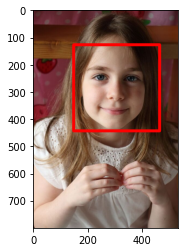

True

In [19]:
# 캐스케이드 파일 지정해서 검출기 생성하기
# OpenCV는 Haar-like 특징 학습기라고 부르는 머신러닝을 사용해 얼굴 인식
# 캐스케이드 파일(얼굴 요소 DB)를 사용해 눈, 코, 잎과 같은 요소의 위치 관계를 확인하고 얼굴인지 확인
# https://github.com/opencv/opencv/tree/master/data/haarcascades
# 얼굴 검출 전용 캐스케이드 파일 외 정면 얼굴, 웃는 얼굴, 눈, 몸 전체를 검출하는 다양한 캐스케이드 파일
cascade_file = "drive/MyDrive/haarcascade_frontalface_alt.xml" # 정면 얼굴
cascade = cv2.CascadeClassifier(cascade_file) # 검출기는 캐스캐이드 파일을 지정해 다양한 물체 검출

# 이미지를 읽어 들이고 그레이스케일로 변환하기 -> 인식을 더잘함
# 밝은 부분은 흰색, 어두운 부분은 검은색. 코는 밝은 부분, 코의 양옆은 어두운 부분
# 얼굴 영역중에 중앙에 밝은 부분이 있다면 얼굴로 판단. 각 요소의 명암패턴을 결합해 얼굴의 형태 확인
filepath = 'drive/MyDrive/girl.png'
img = cv2.imread(filepath)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#얼굴 인식하기 (cascade.detectMulitiScale() 메소드를 사용)
face_list = cascade.detectMultiScale(img_gray, minSize=(150,150))

#결과 확인하기
if len(face_list) == 0:
  print('얼굴 인식 실패')
  quit()

#인식한 부분 표시하기
for (x,y,w,h) in face_list:
  print('얼굴의 좌표 = ', x,y,w,h)
  red = (0,0,255)
  cv2.rectangle(img, (x,y), (x+w, y+h), red, thickness=10)

#이미지 출력하기
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

#이미지 저장하기
cv2.imwrite('drive/MyDrive/face-detect.png', img)

In [35]:
def mosaic(img, rect, size):
  #모자이크 적용할 부분 추출하기
  (x1, y1, x2, y2) = rect
  w = x2 - x1
  h = y2 - y1
  i_rect = img[y1:y2, x1:x2]
  #축소하고 확대하기
  i_small = cv2.resize(i_rect, (size,size))
  i_mos = cv2.resize(i_small, (w,h), interpolation=cv2.INTER_AREA) #보간법
  #모자이크 적용하기
  img2 = img.copy()
  img2[y1:y2, x1:x2] = i_mos
  return img2

In [36]:
#모듈 업로드
!cp /content/drive/MyDrive/mosaic.py /content

In [24]:
!ls

drive  mosaic.py  sample_data


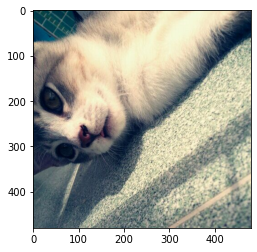

In [26]:
img = cv2.imread('drive/MyDrive/cat.png')

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

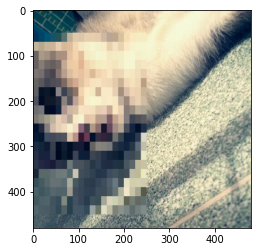

True

In [29]:
from mosaic import mosaic as mosaic

#모자이크 처리하기
mos = mosaic(img, (0,50,250,450), 20)

#이미지 출력하기
plt.imshow(cv2.cvtColor(mos, cv2.COLOR_BGR2RGB))
plt.show()

#이미지 저장하기
cv2.imwrite('drive/MyDrive/cat_mosaic.png', mos)

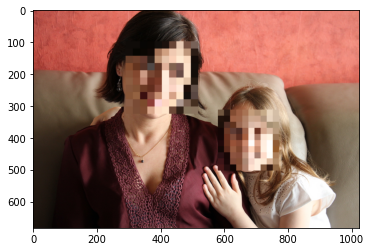

True

In [32]:
#사람 얼굴에 자동으로 모자이크 처리하기
import cv2
from mosaic import mosaic as mosaic
import matplotlib.pyplot as plt

#캐스케이드 파일 저장해서 검출기 생성하기
cascade_file = 'drive/MyDrive/haarcascade_frontalface_alt.xml'
cascade = cv2.CascadeClassifier(cascade_file)

#이미지 그레이스케일로 변환하기
img = cv2.imread('drive/MyDrive/family.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#얼굴 검출하기
face_list = cascade.detectMultiScale(img_gray, minSize=(150,150))
if len(face_list) == 0:
  quit()

#인식한 부분에 모자이크 처리하기
for (x,y,w,h) in face_list:
  img = mosaic(img, (x,y,x+w,y+h), 10)

#이미지 출력하기
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

#이미지 저장하기
cv2.imwrite('drive/MyDrive/family_mosaic.png', img)

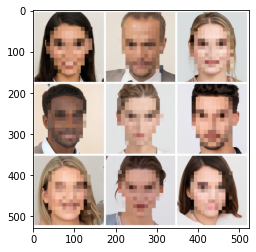

True

In [47]:
#사람 얼굴에 자동으로 모자이크 처리하기
import cv2
from mosaic import mosaic as mosaic
import matplotlib.pyplot as plt

#캐스케이드 파일 저장해서 검출기 생성하기
cascade_file = 'drive/MyDrive/haarcascade_frontalface_alt.xml'
cascade = cv2.CascadeClassifier(cascade_file)

#이미지 그레이스케일로 변환하기
img = cv2.imread('drive/MyDrive/faces.png')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#얼굴 검출하기
face_list = cascade.detectMultiScale(img_gray, minSize=(50,50))
if len(face_list) == 0:
  quit()

#인식한 부분에 모자이크 처리하기
for (x,y,w,h) in face_list:
  img = mosaic(img, (x,y,x+w,y+h), 12)

#이미지 출력하기
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

#이미지 저장하기
cv2.imwrite('drive/MyDrive/faces_mosaic.png', img)

---0---
얼굴의 좌표= 135 109 352 352
---10---
얼굴의 좌표= 174 149 350 350
---20---
얼굴의 좌표= 198 177 362 362
---30---
---40---
---50---
---60---
---70---
---80---


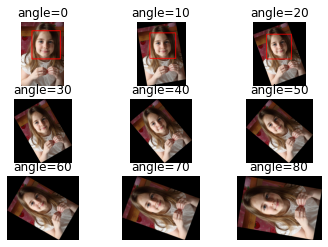

In [55]:
from scipy import ndimage

img = cv2.imread('drive/MyDrive/girl.png')

#얼굴 검출하고 영역표시하기
def face_detect(img):
  img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  face_list = cascade.detectMultiScale(img_gray, minSize=(300,300))
  #인식한 부분 표시하기
  for (x,y,w,h) in face_list:
    print('얼굴의 좌표=', x, y, w, h)
    red = (0,0,255)
    cv2.rectangle(img, (x,y), (x+w, y+h), red, thickness=10)

#여러 각도의 이미지를 만들고 테스트하기
for i in range(0, 9):
  ang = i*10
  print('---'+str(ang)+'---')
  img_r = ndimage.rotate(img, ang)
  face_detect(img_r)
  plt.subplot(3,3,i+1)
  plt.axis('off')
  plt.title('angle='+str(ang))
  plt.imshow(cv2.cvtColor(img_r, cv2.COLOR_BGR2RGB))

plt.show()